# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

- Nama: Joshua Immanuel Fransisko Manurung
- Email:joshuamanurung2609@gmail.com
- Id Dicoding: josss26

## Persiapan

### Menyiapkan library yang dibutuhkan

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import joblib

### Menyiapkan dataset yang akan digunakan

dataset yang digunakan merupakan data pegawai Jaya-Jaya Maju yang diperoleh melalui link berikut [Jaya Jaya Maju](https://raw.githubusercontent.com/dicodingacademy/dicoding_dataset/refs/heads/main/employee/employee_data.csv).

yang memiliki total 35 kolom dengan detail seperti berikut:

* **EmployeeId** - Employee Identifier
* **Attrition** - Did the employee attrition? (0=no, 1=yes)
* **Age** - Age of the employee
* **BusinessTravel** - Travel commitments for the job
* **DailyRate** - Daily salary
* **Department** - Employee Department
* **DistanceFromHome** - Distance from work to home (in km)
* **Education** - 1-Below College, 2-College, 3-Bachelor, 4-Master,5-Doctor
* **EducationField** - Field of Education
* **EnvironmentSatisfaction** - 1-Low, 2-Medium, 3-High, 4-Very High
* **Gender** - Employee's gender
* **HourlyRate** - Hourly salary
* **JobInvolvement** - 1-Low, 2-Medium, 3-High, 4-Very High
* **JobLevel** - Level of job (1 to 5)
* **JobRole** - Job Roles
* **JobSatisfaction** - 1-Low, 2-Medium, 3-High, 4-Very High
* **MaritalStatus** - Marital Status
* **MonthlyIncome** - Monthly salary
* **MonthlyRate** - Mounthly rate
* **NumCompaniesWorked** - Number of companies worked at
* **Over18** - Over 18 years of age?
* **OverTime** - Overtime?
* **PercentSalaryHike** - The percentage increase in salary last year
* **PerformanceRating** - 1-Low, 2-Good, 3-Excellent, 4-Outstanding
* **RelationshipSatisfaction** - 1-Low, 2-Medium, 3-High, 4-Very High
* **StandardHours** - Standard Hours
* **StockOptionLevel** - Stock Option Level
* **TotalWorkingYears** - Total years worked
* **TrainingTimesLastYear** - Number of training attended last year
* **WorkLifeBalance** - 1-Low, 2-Good, 3-Excellent, 4-Outstanding
* **YearsAtCompany** - Years at Company
* **YearsInCurrentRole** - Years in the current role
* **YearsSinceLastPromotion** - Years since the last promotion
* **YearsWithCurrManager** - Years with the current manager

In [ ]:
employee_df = pd.read_csv(
    "https://raw.githubusercontent.com/dicodingacademy/dicoding_dataset/refs/heads/main/employee/employee_data.csv",
    encoding='windows-1252'
)
employee_df.head(5)

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,38,NaN,Travel_Frequently,1444,Human Resources,1,4,Other,1,...,2,80,1,7,2,3,6,2,1,2
1,2,37,1.0,Travel_Rarely,1141,Research & Development,11,2,Medical,1,...,1,80,0,15,2,1,1,0,0,0
2,3,51,1.0,Travel_Rarely,1323,Research & Development,4,4,Life Sciences,1,...,3,80,3,18,2,4,10,0,2,7
3,4,42,0.0,Travel_Frequently,555,Sales,26,3,Marketing,1,...,4,80,1,23,2,4,20,4,4,8
4,5,40,NaN,Travel_Rarely,1194,Research & Development,2,4,Medical,1,...,2,80,3,20,2,3,5,3,0,2


## Data Understanding

Hal pertama yang dilakukan adalah mengecek ukuran dari dataset, tipe data dari masing-masing kolom dan missing value yang terdapat dalam dataset.

In [ ]:
# mengecek ukuran dataset
employee_df.shape

(1470, 35)

ukuran dari dataset tersebut adalah 35 kolom dengan total databaris sebanyak 1470, selanjutnya mengecek tipe data serta missing value yang terdapat dalam dataset menggunakan fungsi info().

In [ ]:
# mengecek tipe data serta missing value
employee_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeId                1470 non-null   int64  
 1   Age                       1470 non-null   int64  
 2   Attrition                 1058 non-null   float64
 3   BusinessTravel            1470 non-null   object 
 4   DailyRate                 1470 non-null   int64  
 5   Department                1470 non-null   object 
 6   DistanceFromHome          1470 non-null   int64  
 7   Education                 1470 non-null   int64  
 8   EducationField            1470 non-null   object 
 9   EmployeeCount             1470 non-null   int64  
 10  EnvironmentSatisfaction   1470 non-null   int64  
 11  Gender                    1470 non-null   object 
 12  HourlyRate                1470 non-null   int64  
 13  JobInvolvement            1470 non-null   int64  
 14  JobLevel

## Data Preparation / Preprocessing

dapat dilihat bahwasanya kolom Attrition memiliki missing value didalamnya dimana hanya terdapat 1058 data dari total 1470. dengan total missing value sebesar 412 data, untuk kemudian dapat dihapus

In [ ]:
# Menghitung Missing value
count_missing_value = employee_df.isna().sum()
count_missing_value

,0
EmployeeId,0
Age,0
Attrition,412
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EmployeeCount,0


In [ ]:
# Menghapus missing value
employee_df = employee_df.dropna()
employee_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1058 entries, 1 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeId                1058 non-null   int64  
 1   Age                       1058 non-null   int64  
 2   Attrition                 1058 non-null   float64
 3   BusinessTravel            1058 non-null   object 
 4   DailyRate                 1058 non-null   int64  
 5   Department                1058 non-null   object 
 6   DistanceFromHome          1058 non-null   int64  
 7   Education                 1058 non-null   int64  
 8   EducationField            1058 non-null   object 
 9   EmployeeCount             1058 non-null   int64  
 10  EnvironmentSatisfaction   1058 non-null   int64  
 11  Gender                    1058 non-null   object 
 12  HourlyRate                1058 non-null   int64  
 13  JobInvolvement            1058 non-null   int64  
 14  JobLevel     

setelah baris yang memiliki missing value dihapus maka jumlah akhir data adalah sebesar 1058 data. selanjutnya mengecek data yang duplikat.

In [ ]:
employee_df.duplicated().sum()

np.int64(0)

tidak ada data yang terduplikasi.


Selanjutnya menghapus kolom yang tidak digunakan, seperti kolom 'Over18', 'EmployeeCount', dan 'StandardHours', karena hanya memiliki satu nilai yaitu Yes untuk Over18, 1 untuk EmployeeCount dan 80 untuk Standardhours.

In [ ]:
# Menghapus kolom yang tidak dibutuhkan
employee_df.drop(columns=['Over18', 'EmployeeCount', 'StandardHours'], inplace=True)
employee_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1058 entries, 1 to 1469
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeId                1058 non-null   int64  
 1   Age                       1058 non-null   int64  
 2   Attrition                 1058 non-null   float64
 3   BusinessTravel            1058 non-null   object 
 4   DailyRate                 1058 non-null   int64  
 5   Department                1058 non-null   object 
 6   DistanceFromHome          1058 non-null   int64  
 7   Education                 1058 non-null   int64  
 8   EducationField            1058 non-null   object 
 9   EnvironmentSatisfaction   1058 non-null   int64  
 10  Gender                    1058 non-null   object 
 11  HourlyRate                1058 non-null   int64  
 12  JobInvolvement            1058 non-null   int64  
 13  JobLevel                  1058 non-null   int64  
 14  JobRole      

Menyesuaikan tipe data dari kolom Attrition

In [ ]:
employee_df['Attrition'] = employee_df['Attrition'].astype(int)

Melakukan konversi data pada beberapa kolom ke bentuk asli nya.

In [ ]:
# konversi fitur
def convert_features(features, type):
  if type == 1:
    employee_df[features] = employee_df[features].map({
        1: 'Below College',
        2: 'College',
        3: 'Bachelor',
        4: 'Master',
        5: 'Doctor'
    })
  elif type == 2:
    for feature in features:
      employee_df[feature] = employee_df[feature].map({
          1: 'Low',
          2: 'Medium',
          3: 'High',
          4: 'Very High'
      })
  elif type == 3:
    for feature in features:
      employee_df[feature] = employee_df[feature].map({
          1: 'Low',
          2: 'Good',
          3: 'Excellent',
          4: 'Outstanding'
      })
  return employee_df

In [ ]:
features1 = 'Education'
features2 = ['EnvironmentSatisfaction', 'JobInvolvement', 'JobSatisfaction', 'RelationshipSatisfaction']
features3 = ['PerformanceRating','WorkLifeBalance']

employee_df = convert_features(features1, 1)
employee_df = convert_features(features2, 2)
employee_df = convert_features(features3, 3)

employee_df

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1,2,37,1,Travel_Rarely,1141,Research & Development,11,College,Medical,Low,...,Excellent,Low,0,15,2,Low,1,0,0,0
2,3,51,1,Travel_Rarely,1323,Research & Development,4,Master,Life Sciences,Low,...,Excellent,High,3,18,2,Outstanding,10,0,2,7
3,4,42,0,Travel_Frequently,555,Sales,26,Bachelor,Marketing,High,...,Excellent,Very High,1,23,2,Outstanding,20,4,4,8
6,7,40,0,Travel_Rarely,1124,Sales,1,College,Medical,Medium,...,Outstanding,High,3,6,2,Good,4,3,0,2
7,8,55,1,Travel_Rarely,725,Research & Development,2,Bachelor,Medical,Very High,...,Excellent,Very High,1,24,2,Excellent,5,2,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1464,1465,28,1,Non-Travel,1366,Research & Development,24,College,Technical Degree,Medium,...,Excellent,Low,0,10,2,Good,10,7,1,9
1465,1466,38,0,Travel_Rarely,168,Research & Development,1,Bachelor,Life Sciences,High,...,Excellent,Very High,0,10,4,Outstanding,1,0,0,0
1467,1468,28,1,Travel_Rarely,1485,Research & Development,12,Below College,Life Sciences,High,...,Excellent,Very High,0,1,4,Good,1,1,0,0
1468,1469,40,0,Non-Travel,458,Research & Development,16,College,Life Sciences,High,...,Excellent,Medium,1,6,0,Excellent,4,2,0,0


### Exploratory Data Analysis (EDA)

#### Statistik Deskriptif

In [ ]:
# Rangkuman statistik deskriptif untuk fitur secara keseluruhan
employee_df.describe(include='all')

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1058.000000,1058.000000,1058.000000,1058,1058.000000,1058,1058.000000,1058,1058,1058,...,1058,1058,1058.000000,1058.000000,1058.000000,1058,1058.000000,1058.00000,1058.000000,1058.000000
unique,NaN,NaN,NaN,3,NaN,3,NaN,5,6,4,...,2,4,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,Travel_Rarely,NaN,Research & Development,NaN,Bachelor,Life Sciences,High,...,Excellent,High,NaN,NaN,NaN,Excellent,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,746,NaN,701,NaN,410,436,335,...,899,324,NaN,NaN,NaN,638,NaN,NaN,NaN,NaN
mean,736.656900,37.055766,0.169187,NaN,809.542533,NaN,8.978261,NaN,NaN,NaN,...,NaN,NaN,0.762760,11.435728,2.769376,NaN,7.065217,4.26087,2.203214,4.142722
std,427.440538,9.410421,0.375094,NaN,408.478049,NaN,8.040608,NaN,NaN,NaN,...,NaN,NaN,0.837537,8.016429,1.302689,NaN,6.265227,3.61747,3.266948,3.599044
min,2.000000,18.000000,0.000000,NaN,102.000000,NaN,1.000000,NaN,NaN,NaN,...,NaN,NaN,0.000000,0.000000,0.000000,NaN,0.000000,0.00000,0.000000,0.000000
25%,364.250000,30.000000,0.000000,NaN,465.250000,NaN,2.000000,NaN,NaN,NaN,...,NaN,NaN,0.000000,6.000000,2.000000,NaN,3.000000,2.00000,0.000000,2.000000
50%,731.500000,36.000000,0.000000,NaN,817.500000,NaN,7.000000,NaN,NaN,NaN,...,NaN,NaN,1.000000,10.000000,3.000000,NaN,5.000000,3.00000,1.000000,3.000000
75%,1117.750000,43.000000,0.000000,NaN,1168.500000,NaN,13.000000,NaN,NaN,NaN,...,NaN,NaN,1.000000,16.000000,3.000000,NaN,9.000000,7.00000,3.000000,7.000000


In [ ]:
# Ringkasan Deskriptif Statistik untuk fitur Numerik
employee_df.describe(exclude='object')

,EmployeeId,Age,Attrition,DailyRate,DistanceFromHome,HourlyRate,JobLevel,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.00000,1058.000000,1058.000000
mean,736.656900,37.055766,0.169187,809.542533,8.978261,65.643667,2.090737,6625.945180,14267.281664,2.706994,15.155955,0.762760,11.435728,2.769376,7.065217,4.26087,2.203214,4.142722
std,427.440538,9.410421,0.375094,408.478049,8.040608,20.324861,1.136514,4837.695042,7048.077305,2.523526,3.641097,0.837537,8.016429,1.302689,6.265227,3.61747,3.266948,3.599044
min,2.000000,18.000000,0.000000,102.000000,1.000000,30.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,364.250000,30.000000,0.000000,465.250000,2.000000,48.000000,1.000000,2900.250000,8277.250000,1.000000,12.000000,0.000000,6.000000,2.000000,3.000000,2.00000,0.000000,2.000000
50%,731.500000,36.000000,0.000000,817.500000,7.000000,65.000000,2.000000,4903.500000,14201.000000,2.000000,14.000000,1.000000,10.000000,3.000000,5.000000,3.00000,1.000000,3.000000
75%,1117.750000,43.000000,0.000000,1168.500000,13.000000,83.000000,3.000000,8736.500000,20364.000000,4.000000,18.000000,1.000000,16.000000,3.000000,9.000000,7.00000,3.000000,7.000000
max,1470.000000,60.000000,1.000000,1499.000000,29.000000,100.000000,5.000000,19999.000000,26999.000000,9.000000,25.000000,3.000000,40.000000,6.000000,40.000000,18.00000,15.000000,17.000000


In [ ]:
# Ringkasan Deskriptif Statistik untuk fitur Kategorikal
employee_df.describe(include='object')

,BusinessTravel,Department,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobRole,JobSatisfaction,MaritalStatus,OverTime,PerformanceRating,RelationshipSatisfaction,WorkLifeBalance
count,1058,1058,1058,1058,1058,1058,1058,1058,1058,1058,1058,1058,1058,1058
unique,3,3,5,6,4,2,4,9,4,3,2,2,4,4
top,Travel_Rarely,Research & Development,Bachelor,Life Sciences,High,Male,High,Sales Executive,Very High,Married,No,Excellent,High,Excellent
freq,746,701,410,436,335,620,625,232,340,464,751,899,324,638


#### Distribusi fitur numerik

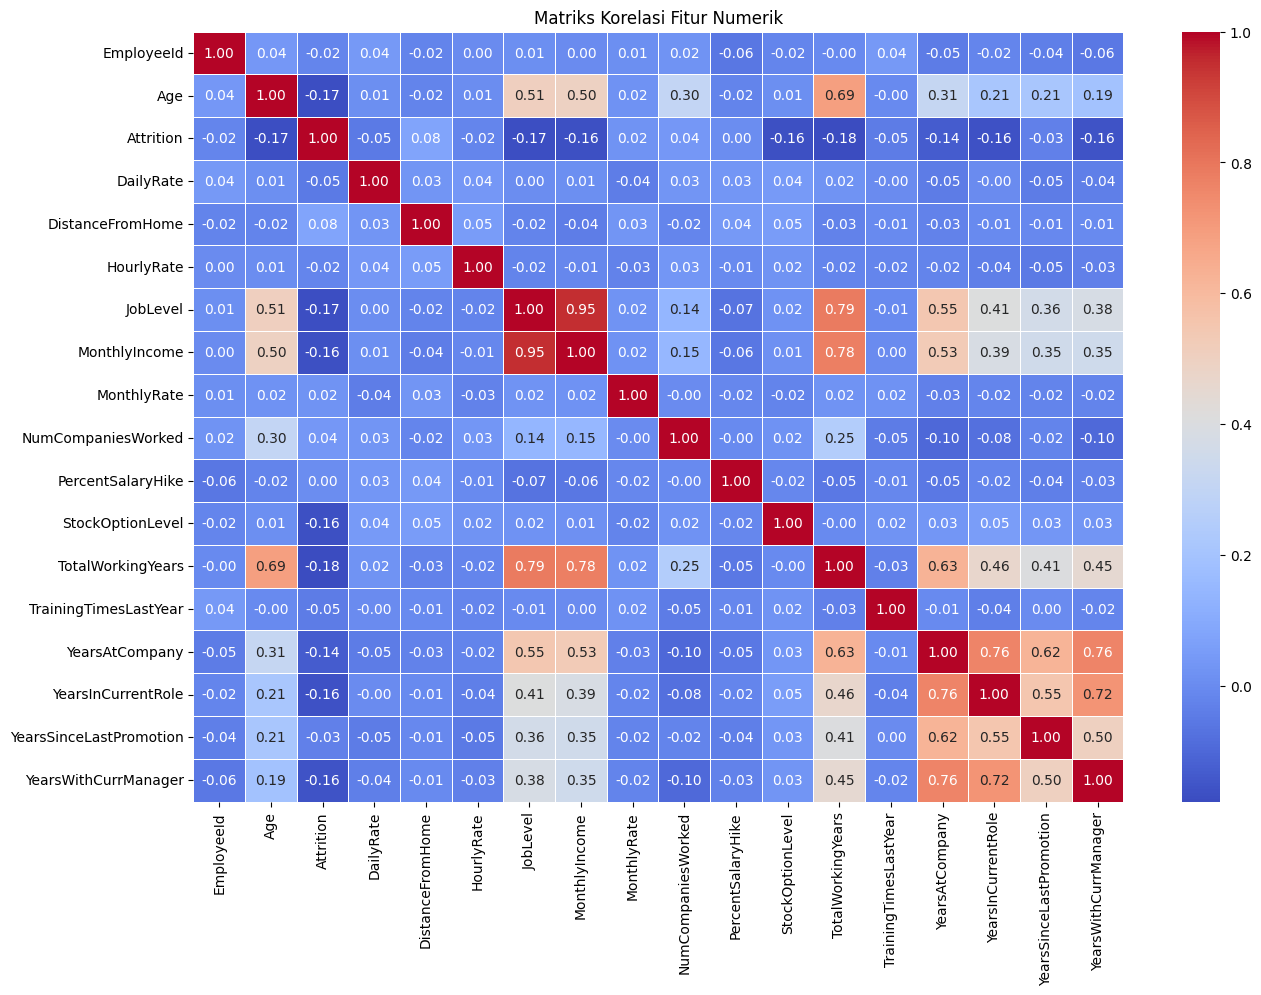

In [ ]:
# Membuat heatmap matrix corelation untuk numeric features
corr_matrix = employee_df.corr(numeric_only=True)
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriks Korelasi Fitur Numerik')
plt.show()

Berdasarkan heatmap tersebut dapat dilihat bahwa Fitur:
1.   **Age** memiliki korelasi atau hubungan yang kuat secara berurut dengan fitur **TotalWorkingYears**, **JobLevel**, dan **MonthlyIncome**.
2.   **JobLevel** memiliki hubungan yang kuat secara berurut dengan fitur **MonthlyIncome**, **TotalWorkingYears**, dan **YearsAtCompany**.
3. **MonthlyIncome** memiliki hubungan yang kuat secara berurut dengan fitur **TotalWorkingYears** dan **YearsAtCompany**.
4. **TotalWorkingYears** memiliki korelasi yang kuat dengan **YearsAtCompany**.
5. **YearsAtCompany** memiliki korelasi yang kuat secara berurut dengan fitur **YearsInCurrentRole**, **YearsWithCurrManager**, **YearsSinceLastPromotion**.
6. **YearsSinceLastPromotion** memiliki korelasi yang kuat dengan fitur **YearsWithCurrManager**.

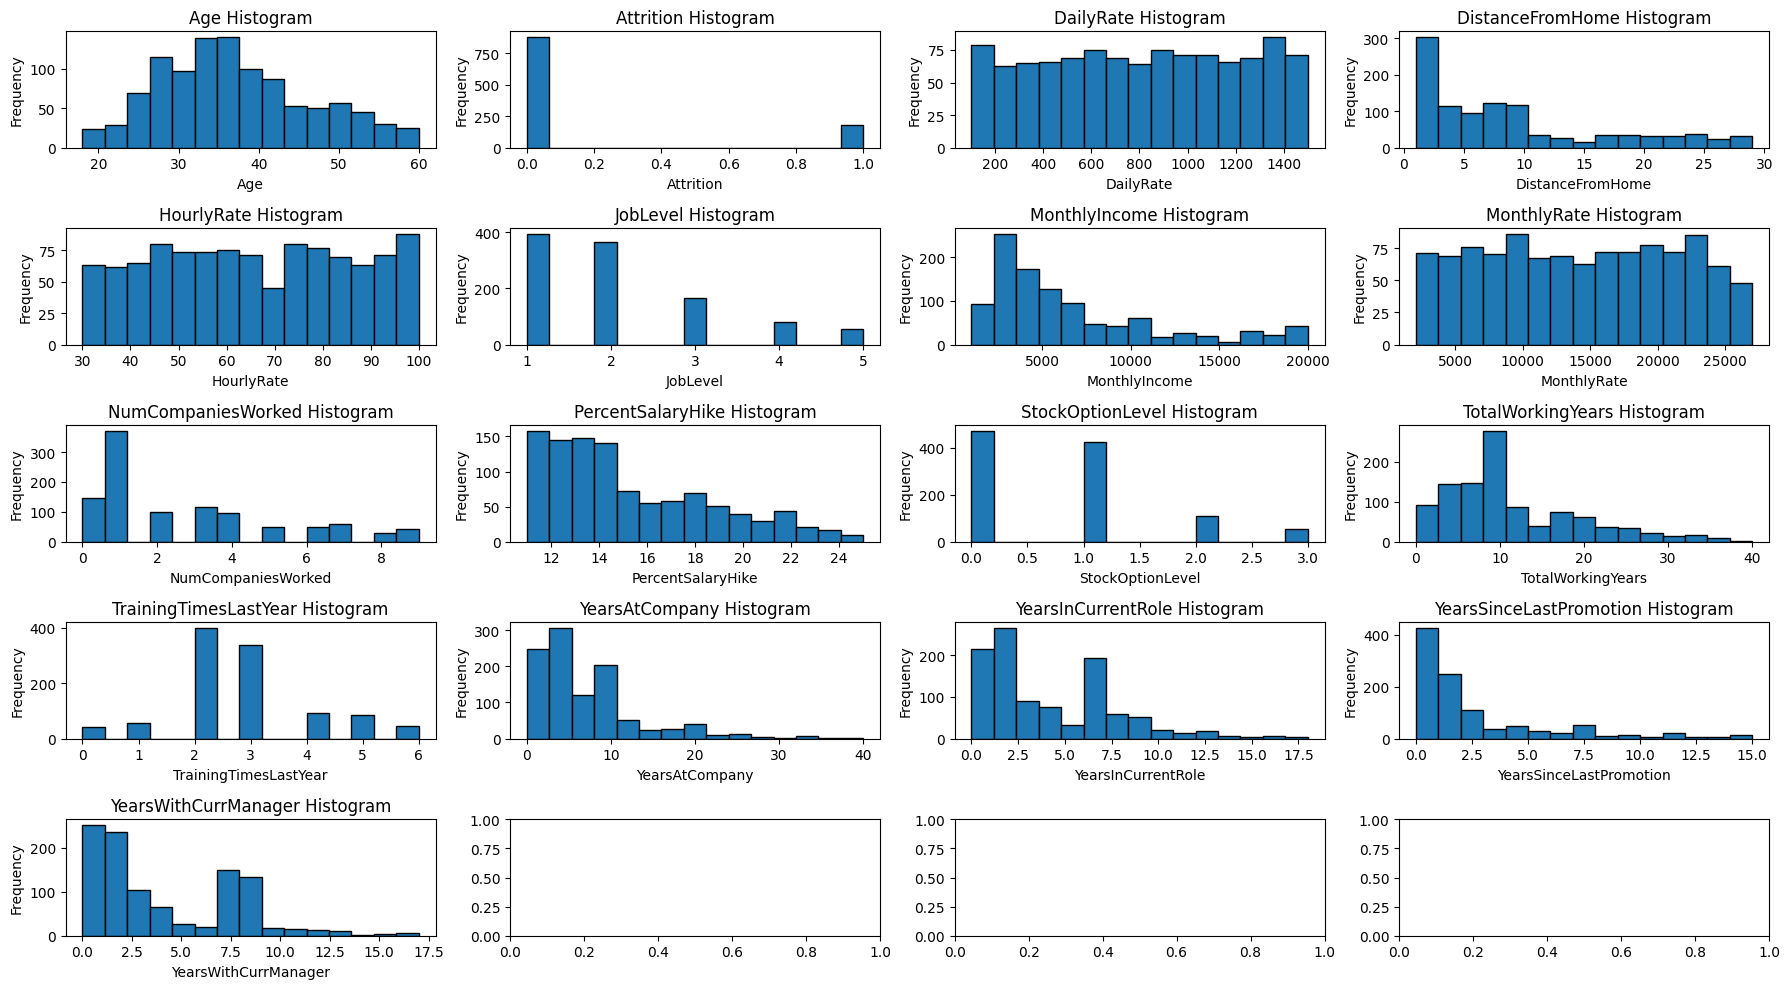

In [ ]:
# Membuat grafik histogram guna melihat distribusi fitur numerik
numeric_features = []

for feature in employee_df.columns:
  if employee_df[feature].dtype != 'object':
    numeric_features.append(feature)

# Membuat Histogram
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(18, 10))
axes = axes.flatten()

for i, column in enumerate(numeric_features[1:]):
    employee_df[column].plot.hist(ax=axes[i], bins=15, edgecolor='black')
    axes[i].set_title(f'{column} Histogram')
    axes[i].set_xlabel(column)

plt.tight_layout()
plt.show()

Berdasarkan plot histogram tersebut dapat dilihat bahwasanya fitur **Attrition** memiliki distribusi kelas yang tidak seimbang dengan dominan di kelas 0. Fitur **Age** memiliki distribusi data yang normal. Fitur **DailyRate**, **HourlyRate**, dan **MonthlyRate** memilki distribusi yang seragam (Uniform), serta fitur numerik lainnya berbentuk Right-Skewed Distribution.



Berdasarkan heatmap correlation serta plot histogram fitur numerik tersebut, dapat dilihat fitur-fitur seperti YearsAtCompany. MonthlyIncome, JobLevel, serta YearsSinceLastPromotion, berkemungkinan kuat berhubungan dengan fitur Attrition.


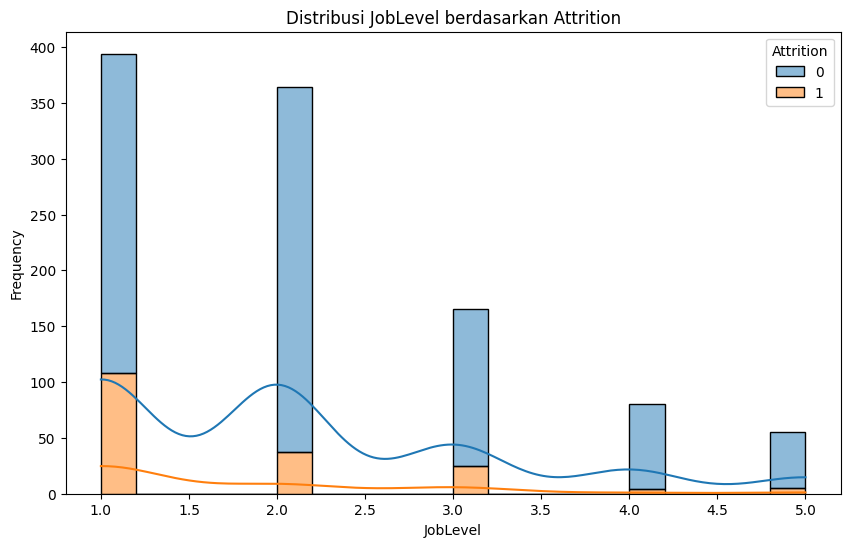

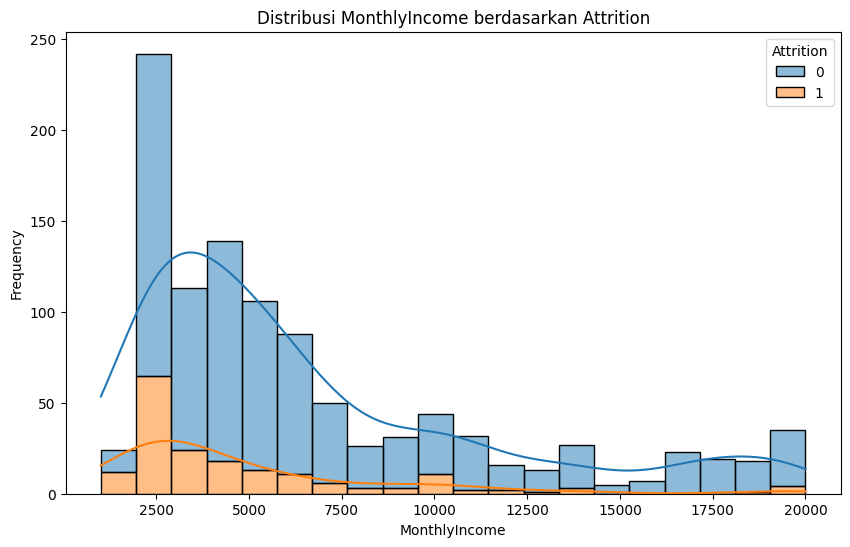

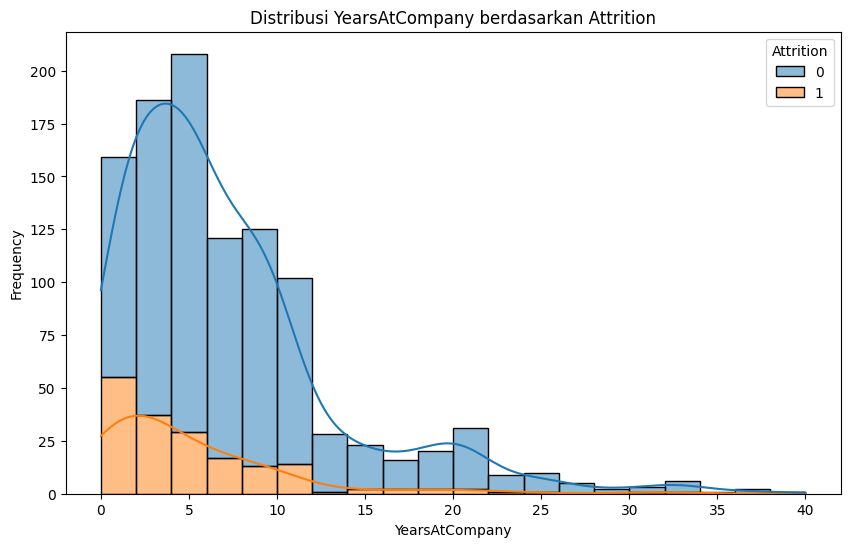

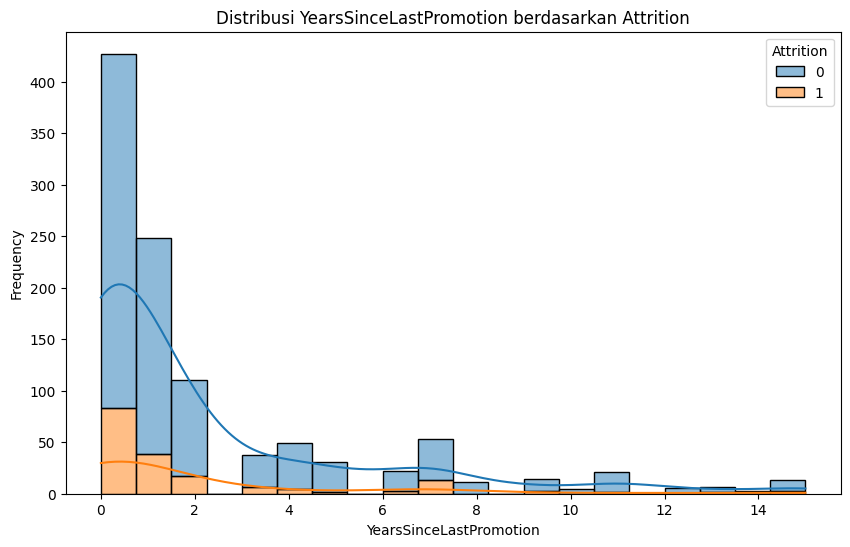

In [ ]:
# membuat plot perbandingan fitur Attrition dengan fitur numerik lainnya
numeric = ['JobLevel', 'MonthlyIncome', 'YearsAtCompany', 'YearsSinceLastPromotion']
for feature in numeric:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=employee_df, x=feature, hue='Attrition', multiple="stack", kde=True, bins=20)
    plt.title(f'Distribusi {feature} berdasarkan Attrition')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

Berdasarkan Plot distribusi fitur tersebut dapat dilihat:
1. Berdasarkan **JobLevel**, pegawai yang melakukan Attrition kebanyakan berasal dari pegawai dengan JobLevel 1 dan disusul dengan JobLevel 2
2. Berdasarkan **MonthlyIncome**, pegawai dengan MonthlyIncome berkisar 2000an paling banyak melakukan Attrition dan tren attrition menurun ketika 3000an keatas.
3. Berdasarkan **YearsAtCompany**, pegawai yang bekerja berkisar di 0-10 tahunan memiliki tren attrition yang menurun yang tertinggi di 0-1 tahun dan terus menurun.
4. Berdasarkan **YearsSinceLastPromotion**, pegawai dengan jarak 0-2 tahun setelah promosi memiliki attrition tertinggi.


Selain fitur tersebut salah satu fitur yang mempengaruhi pegawai untuk melakukan Attrition adalah Jarak ke Kantor (DistanceFromHome), berikut perbandingan distribusinya.


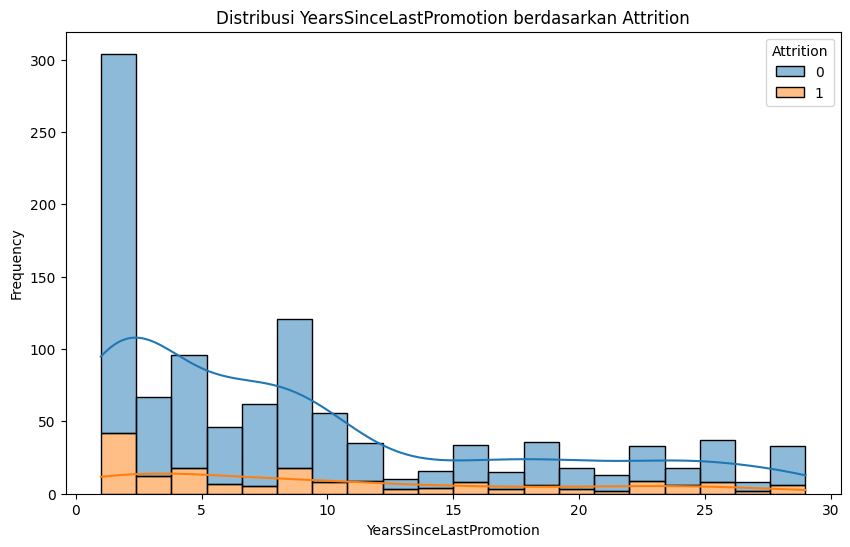

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=employee_df, x='DistanceFromHome', hue='Attrition', multiple="stack", kde=True, bins=20)
plt.title(f'Distribusi {feature} berdasarkan Attrition')
plt.xlabel(feature)
plt.ylabel('Frequency')
plt.show()

Berdasarkan grafik perbandingan tersebut dapat dilihat bahwasanya distribusi pegawai yang melakukan attrition lebih banyak pada jarak 0-15 km.

In [ ]:
# membuat fungsi untuk membuat grafik perbandingan fitur Numerik
def numerical_dis_plot(features, df, segment_feature=None, showfliers=True):
    fig, ax = plt.subplots(len(features), 1,figsize=(20,30))
    for i, feature in enumerate(features):
        if segment_feature:
            sns.boxplot(y=segment_feature, x=feature, data=df, ax=ax[i], showfliers=showfliers)
            ax[i].set_title(f'{feature} berdasarkan {segment_feature}')
            ax[i].set_xlabel(segment_feature)
        else:
            sns.boxplot(x=feature, data=df, ax=ax[i], showfliers=showfliers)
    plt.tight_layout()
    plt.show()

#### Distribusi Fitur Kategorikal

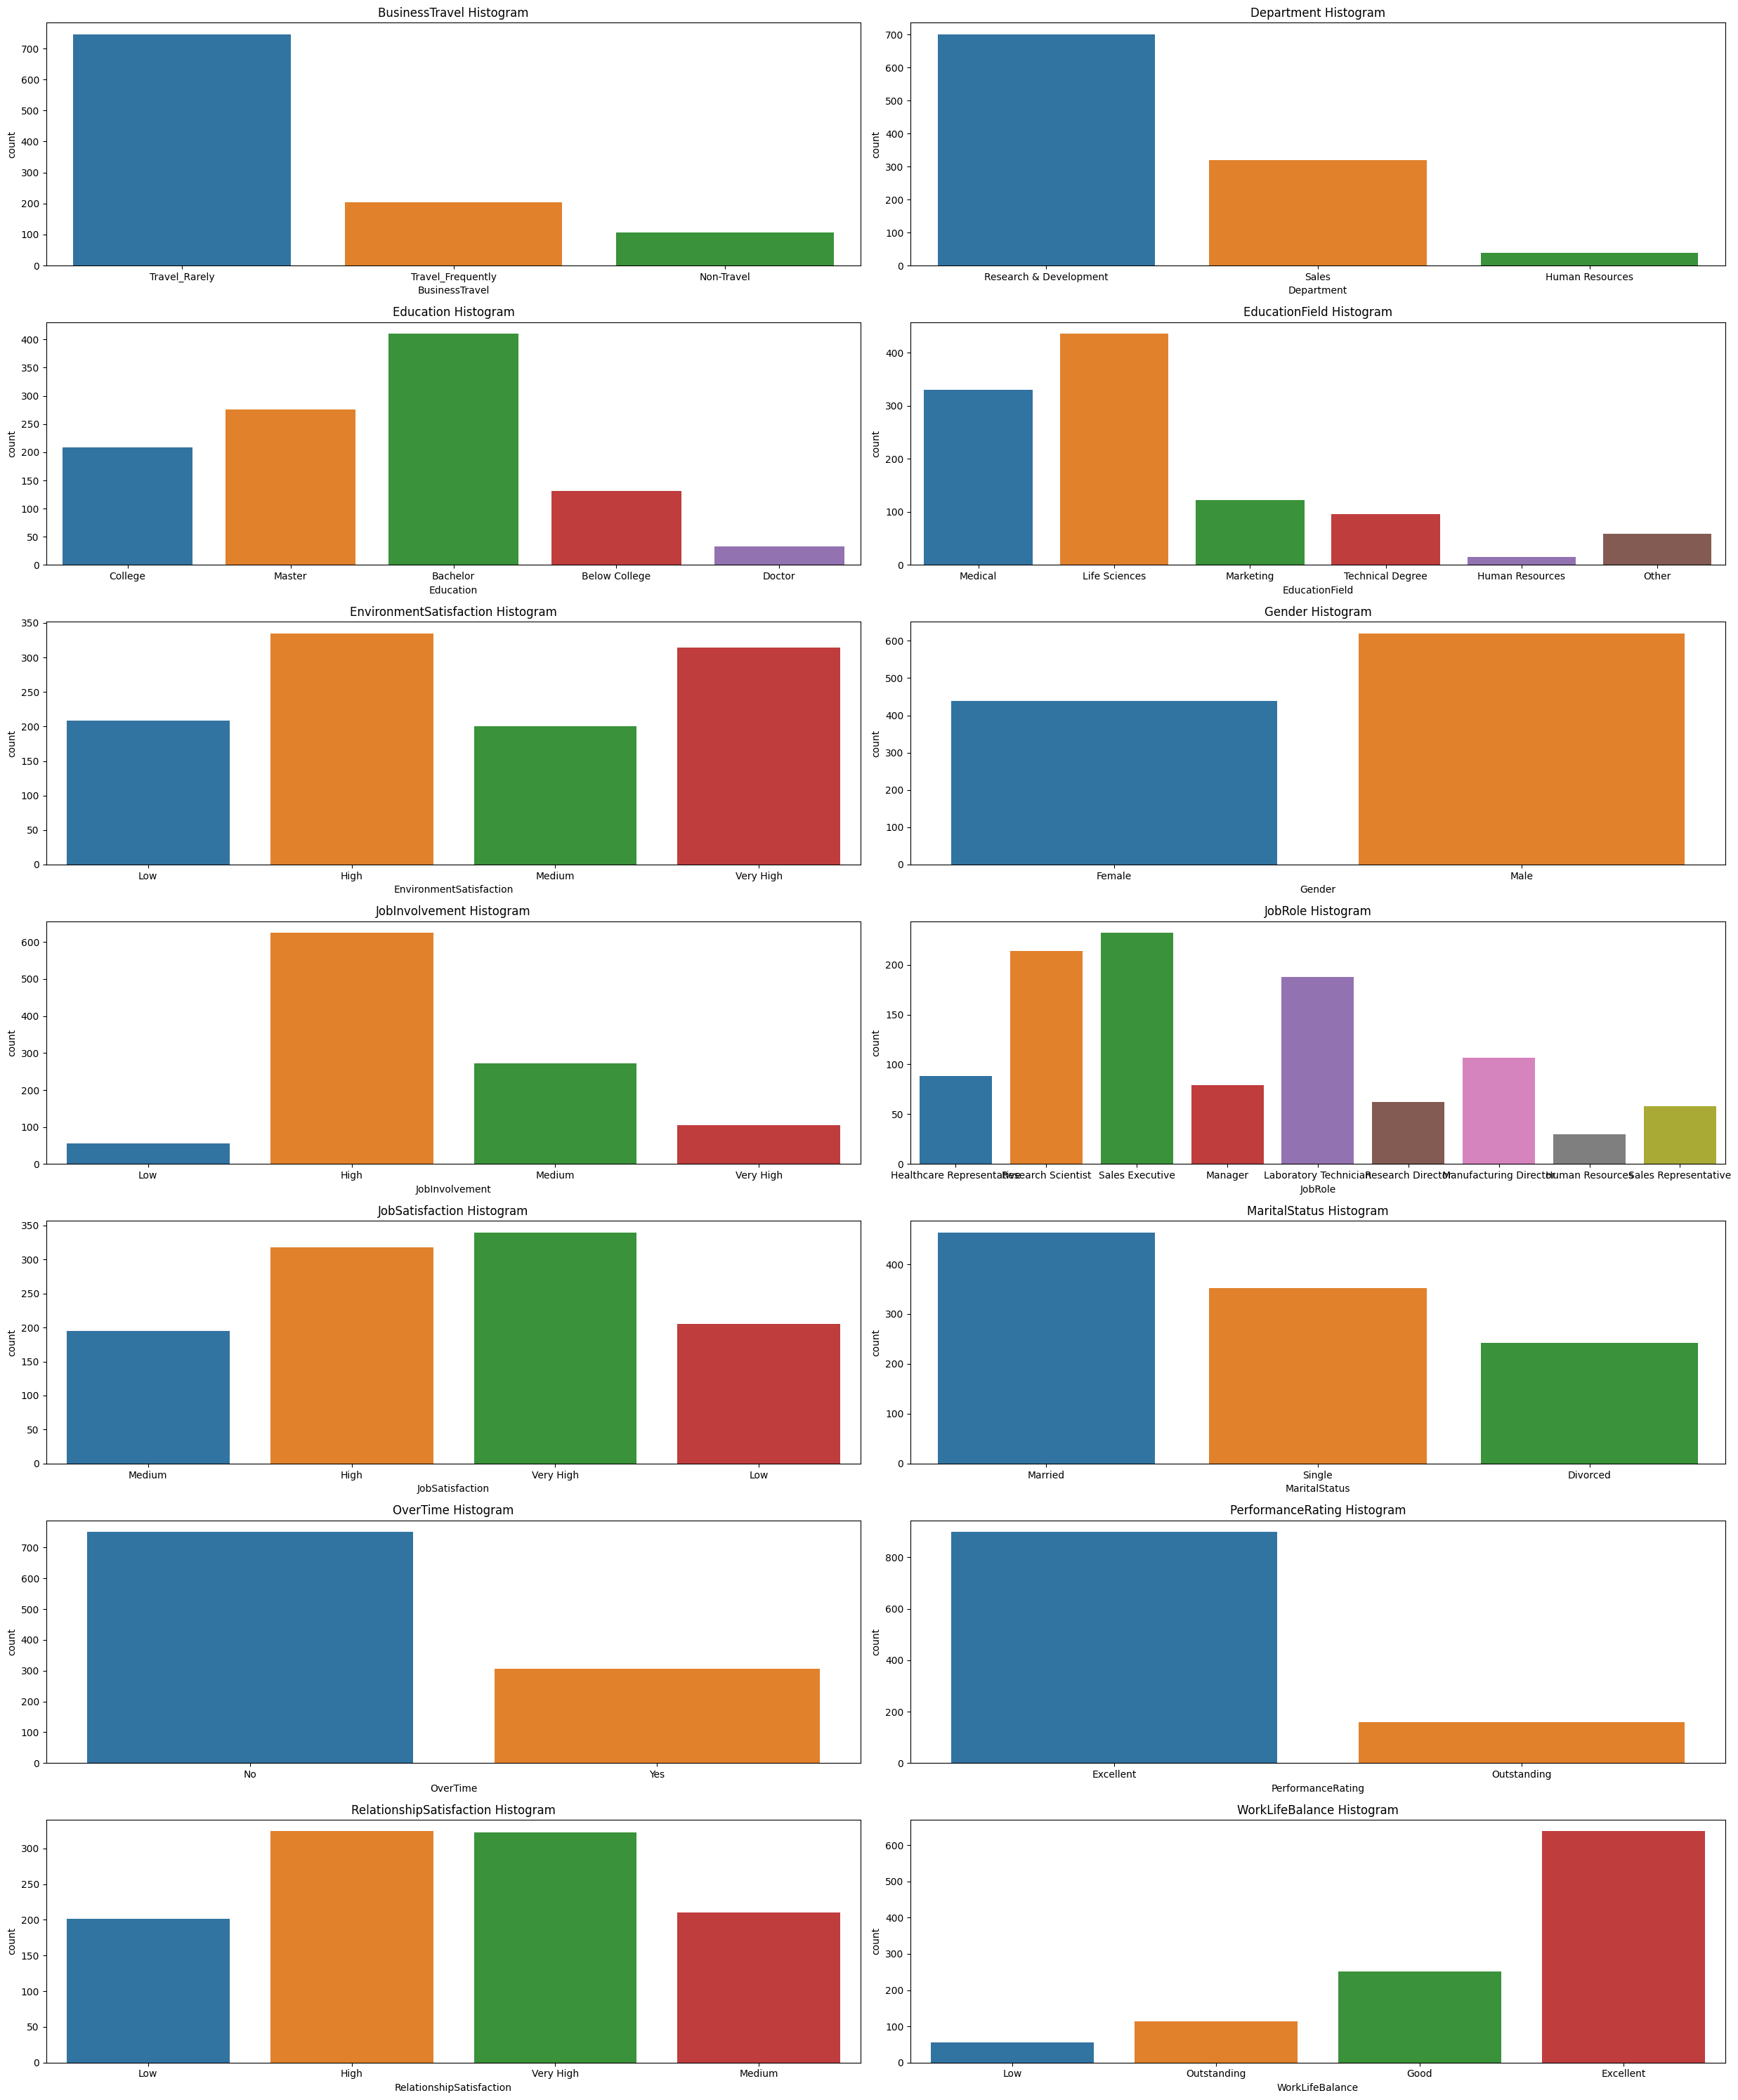

In [ ]:
# Membuat grafik histogram guna melihat distribusi fitur kategorikal
categorical_features = []

for feature in employee_df.columns:
  if employee_df[feature].dtype == 'object':
    categorical_features.append(feature)

# membuat histogram
fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(25, 30))
axes = axes.flatten()

for i, column in enumerate(categorical_features):
    sns.countplot(data=employee_df, x=column, hue=column, ax=axes[i])
    axes[i].set_title(f'{column} Histogram')

plt.tight_layout()
plt.show()

In [ ]:
print(categorical_features)

['BusinessTravel', 'Department', 'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'OverTime', 'PerformanceRating', 'RelationshipSatisfaction', 'WorkLifeBalance']


Berdasarkan histogram tersebut dapat dilihat bahwasanya:
1. Kebanyakan pegawai berjenis kelamin pria
2. pegawai banyak yang jarang melakukan perjalanan bisnis.
3. pegawai banyak berasal dari Departement Research & Development disusul dengan Sales.
4. Kebanyakan pegawai tingkat pendidikannya sarjana.
5. bidang pendidikan pegawai kebanyakan berasal dari Life Sciences dan disusul bidang Medical.
6. Environment satisfaction yang dirasakan oleh pegawai cenderung tinggi.
7. Job Involvement (keterlibatan pegawai dalam pekerjaan) yang dirasakan oleh pegawai cenderung tinggi.
8. Job Role pegawai kebanyakan adalah Sales Executive dan diikuti dengan Research Scientist.
9. JobSatisfaction pegawai cenderung tinggi.
10. kebanyakan pegawai sudah menikah, dan diikuti dengan pegawai yang single.
11. banyak pegawai yang tidak overtime
12. performance rating pegawai cenderung baik, dengan perolehan Excellent tertinggi diikuti  outstanding.
13. tingkat kepuasan karyawan terhadap rekan kerja cenderung tinggi, pada high dan very high.
14. tingkat WorkLifeBalance karyawan sangat baik.


In [ ]:
# membuat fungsi untuk membuat grafik perbandingan fitur kategorikal
def categorical_plot(features, df, segment_feature=None):
    fig, ax = plt.subplots(len(features), 1,figsize=(8,15))
    for i, feature in enumerate(features):
        if segment_feature:
            sns.countplot(data=df, x=segment_feature, hue=feature, ax=ax[i])
            ax[i].set_title(f'{feature} berdasarkan {segment_feature}')
            ax[i].set_xlabel(segment_feature)
        else:
            sns.countplot(data=df, x=feature, ax=ax[i])
    plt.tight_layout()
    plt.show()

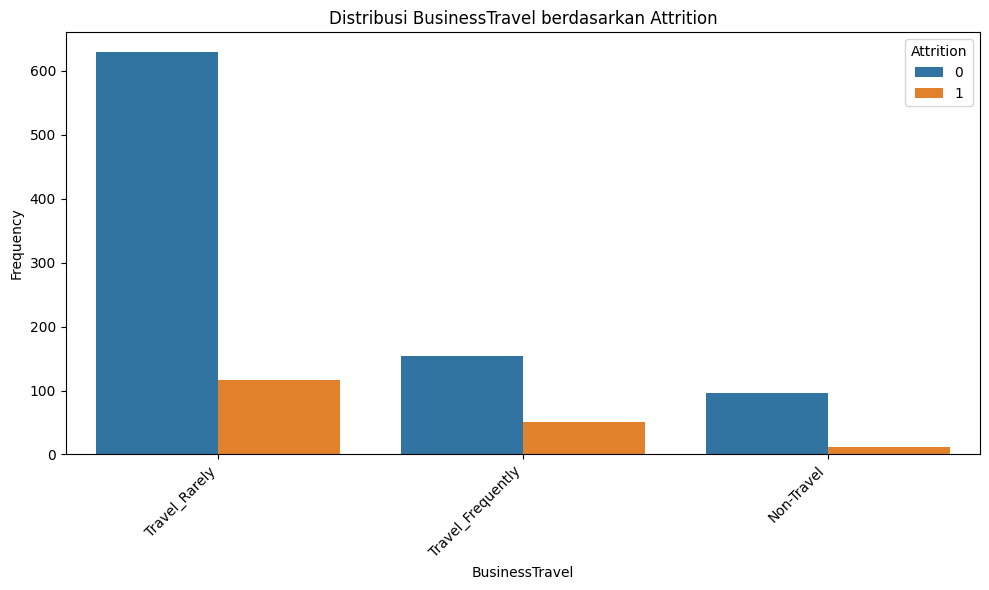

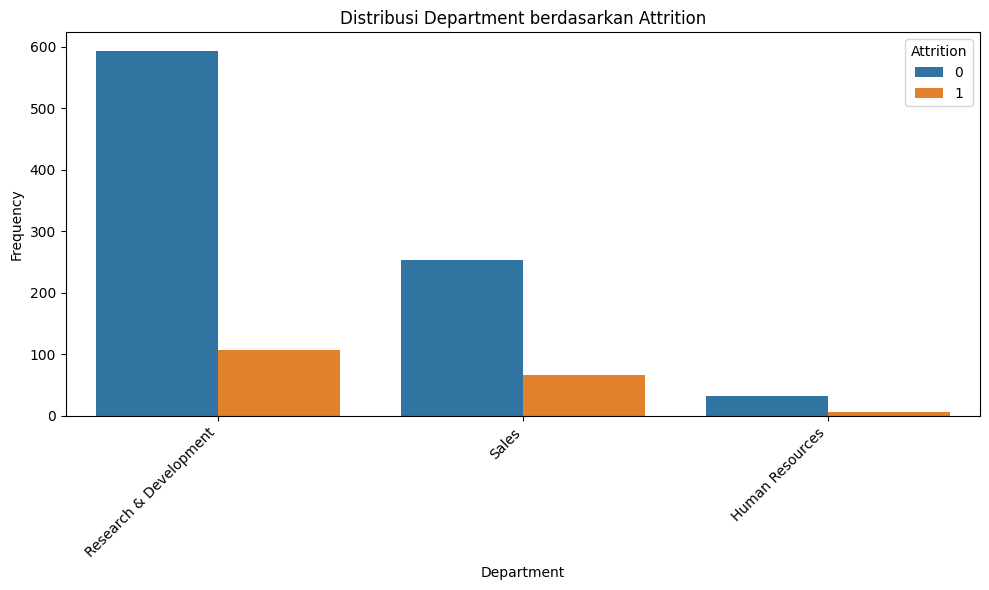

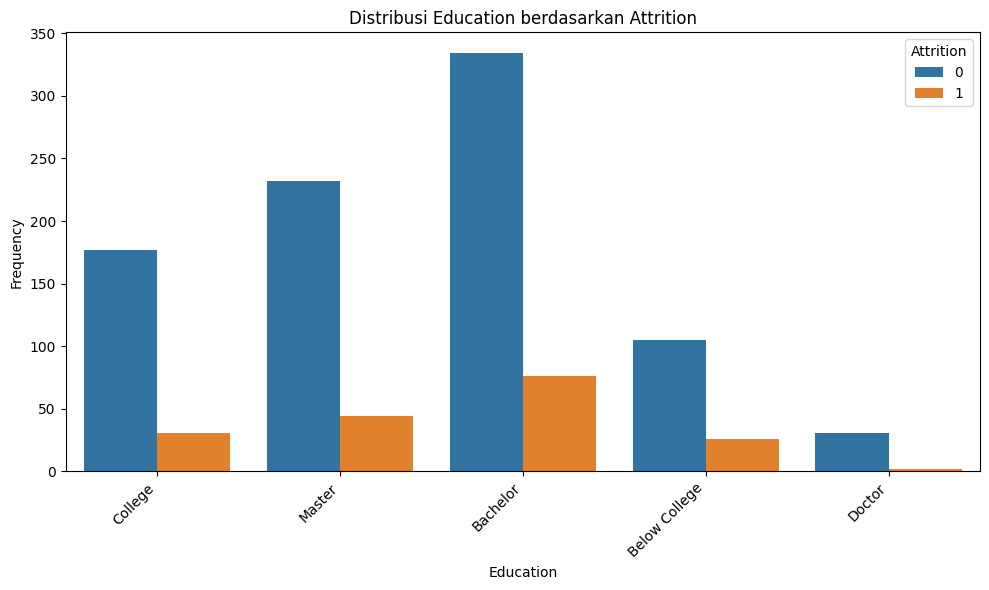

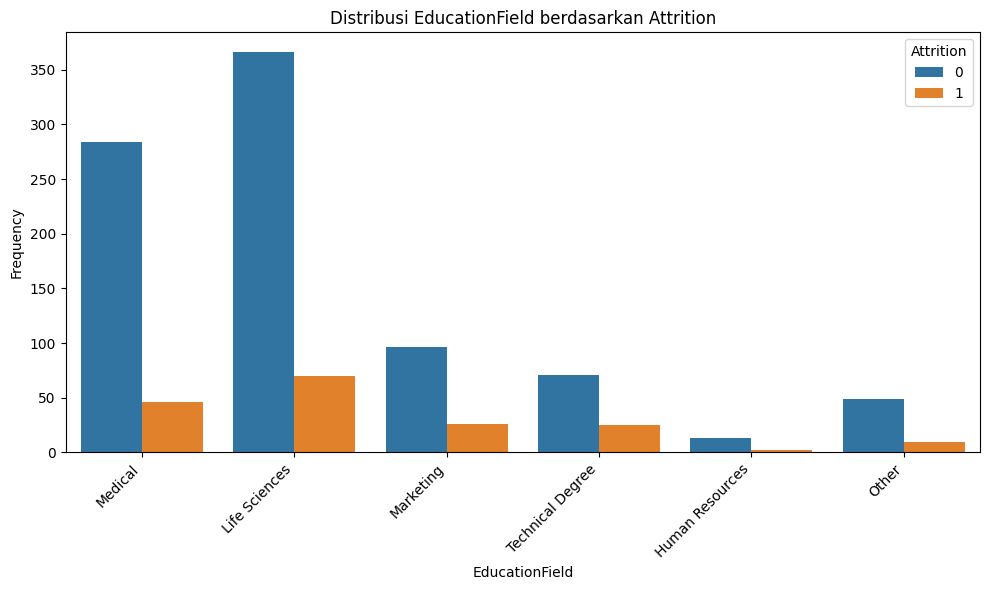

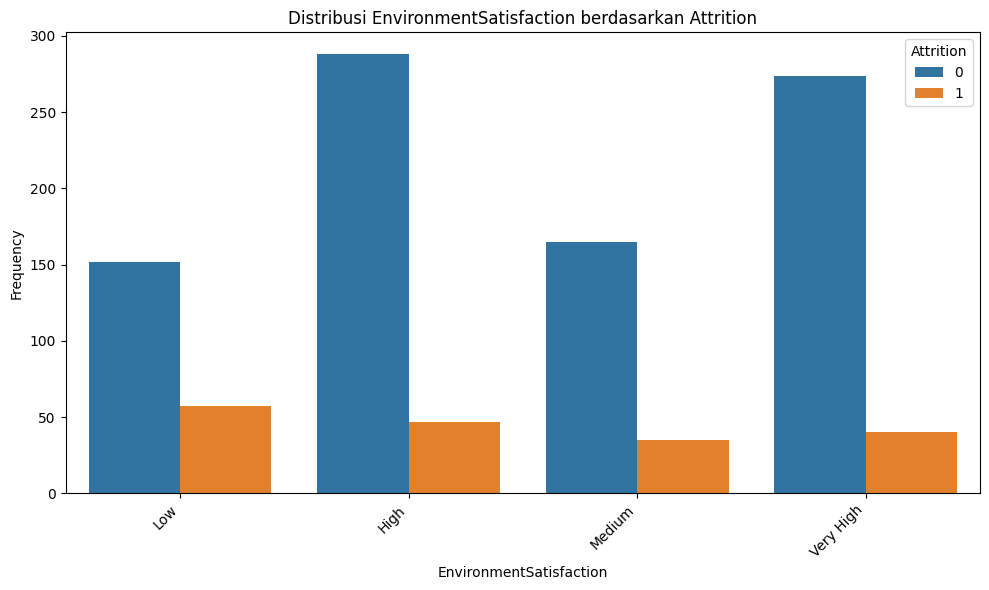

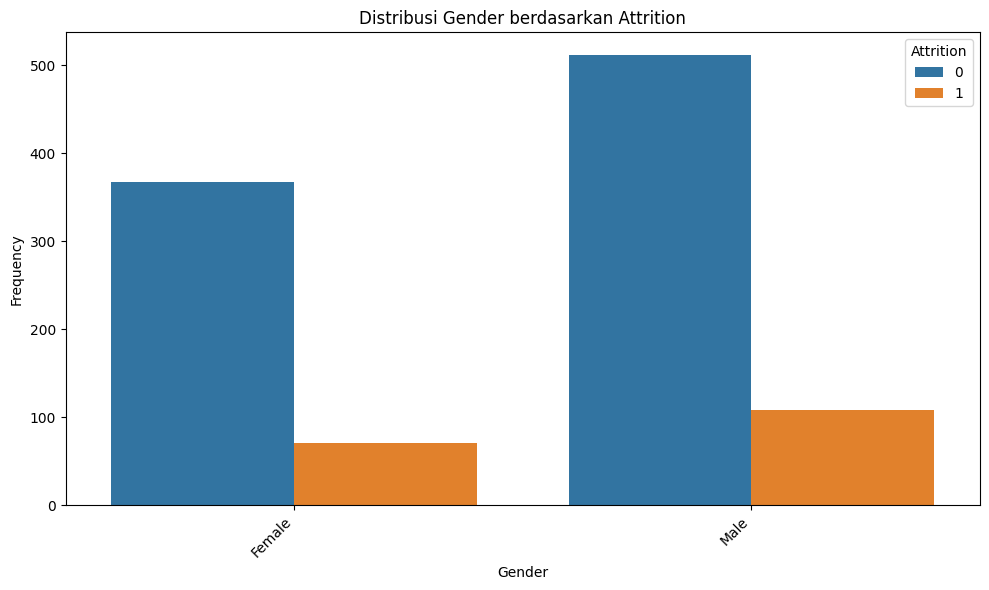

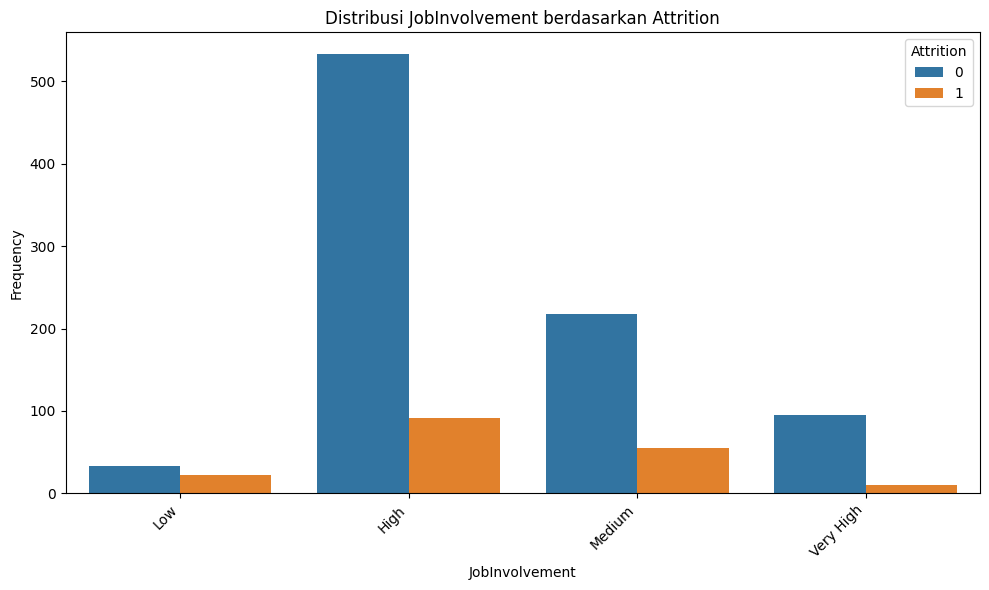

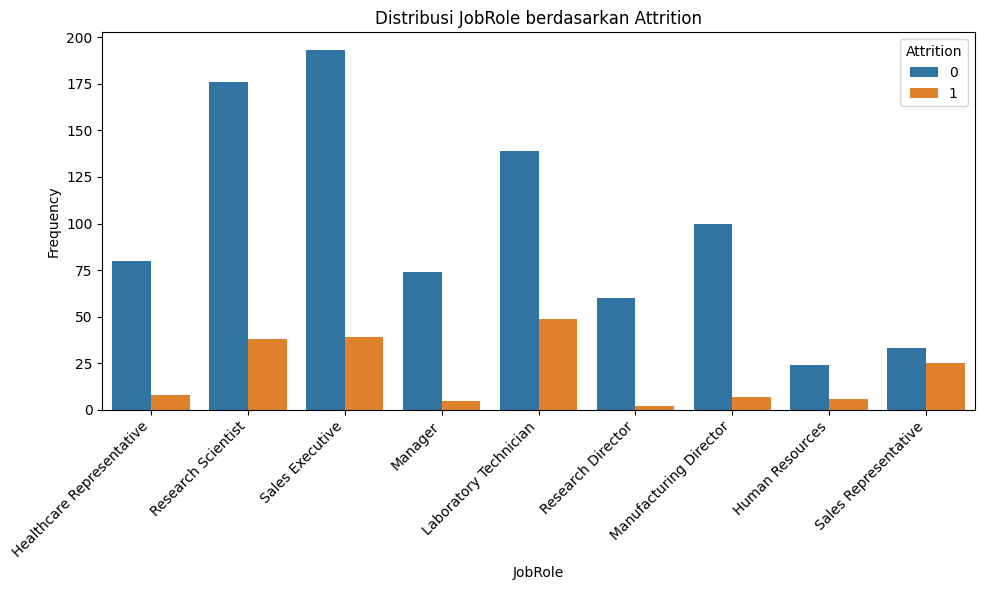

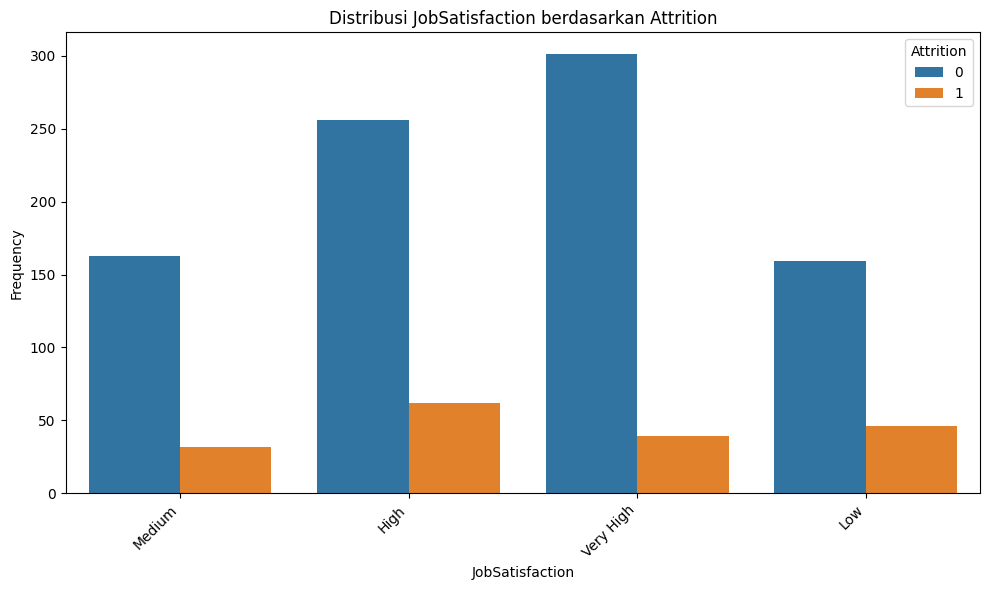

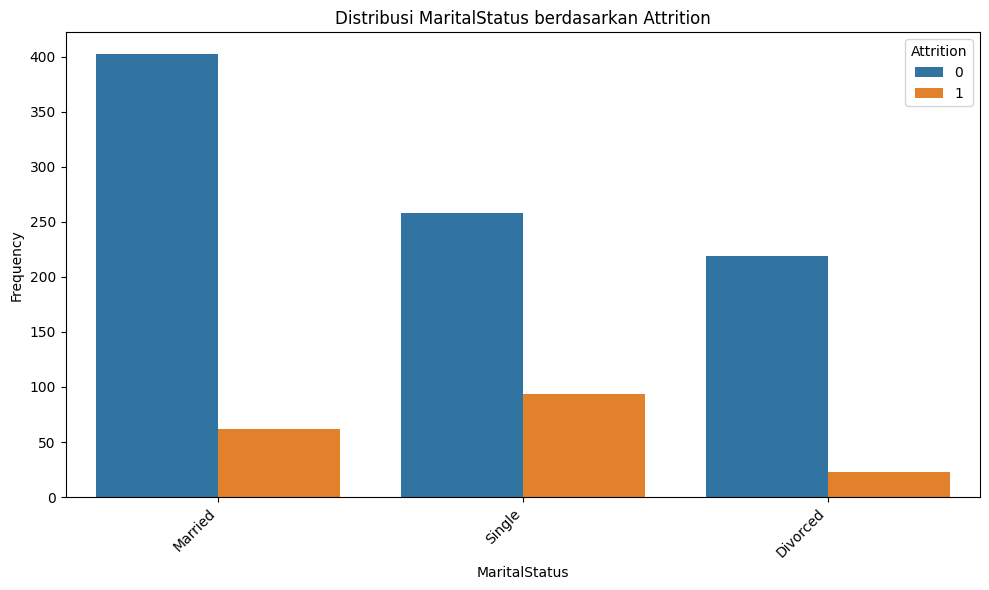

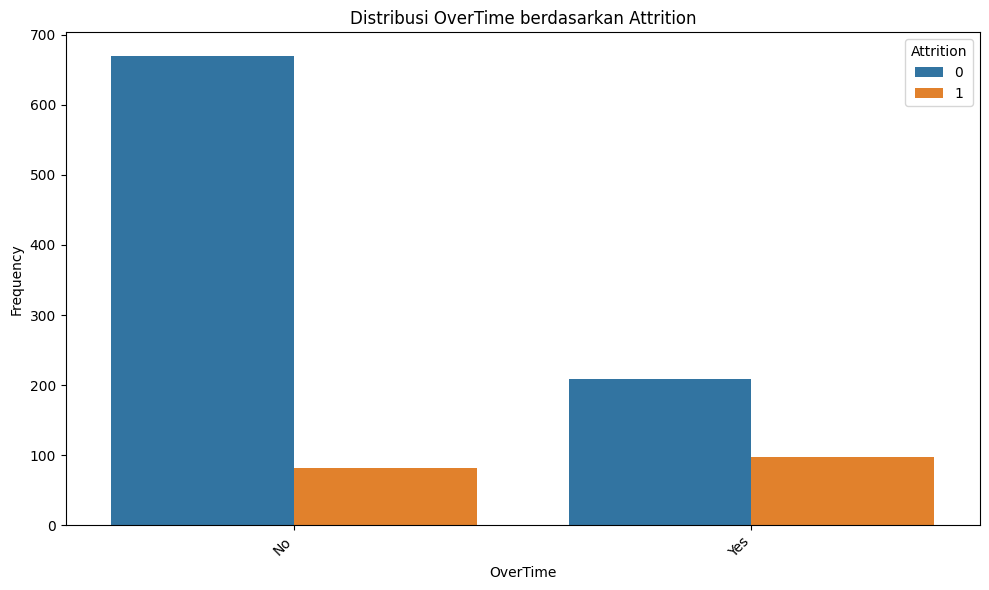

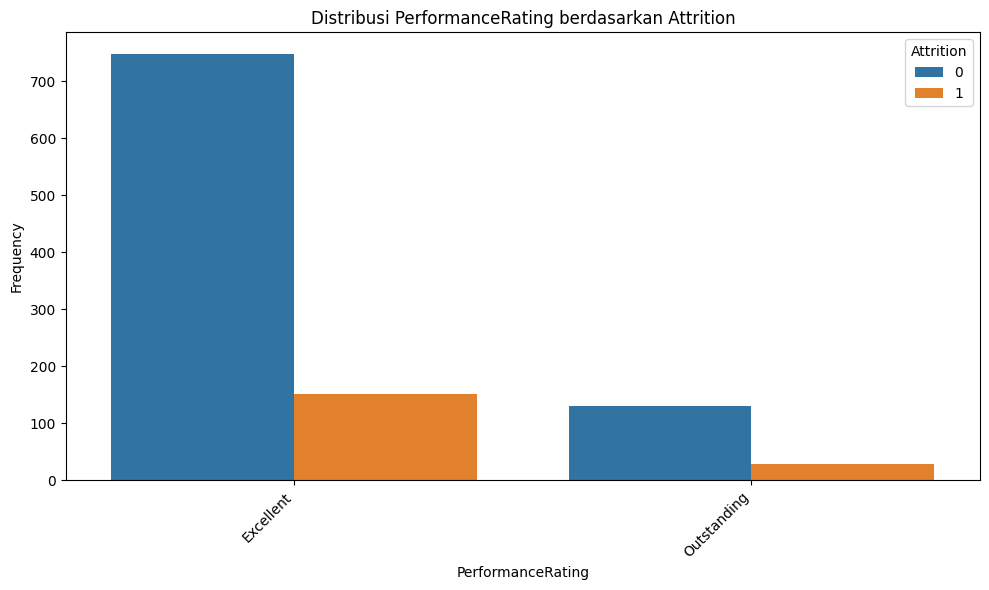

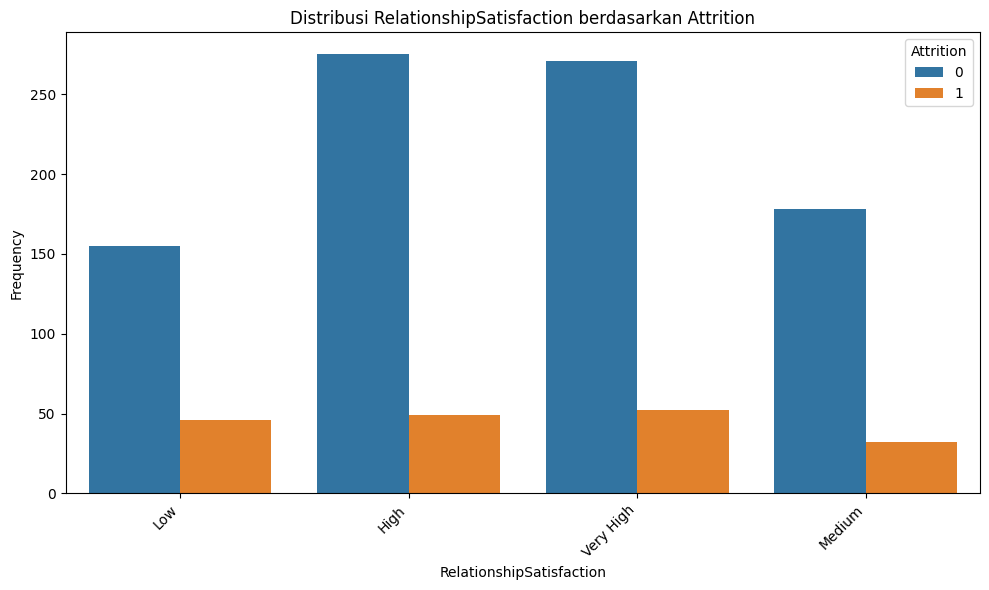

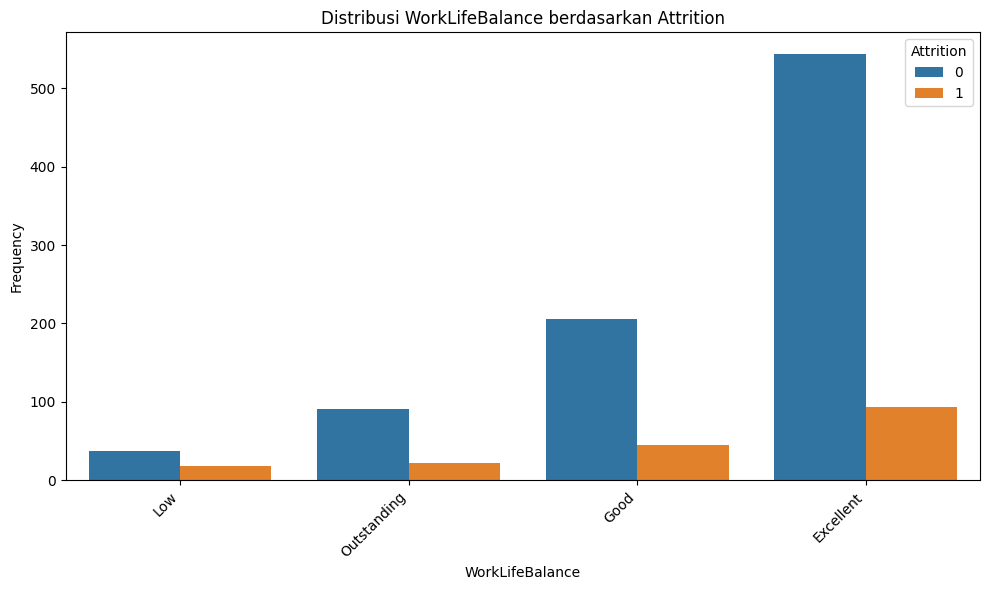

In [ ]:
# Perbandingan Distribusi antara Fitur Attrition dengan Fitur Kategorikal Lainnya
for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=employee_df, x=feature, hue='Attrition')
    plt.title(f'Distribusi {feature} berdasarkan Attrition')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

Attrition
0    879
1    179
Name: count, dtype: int64


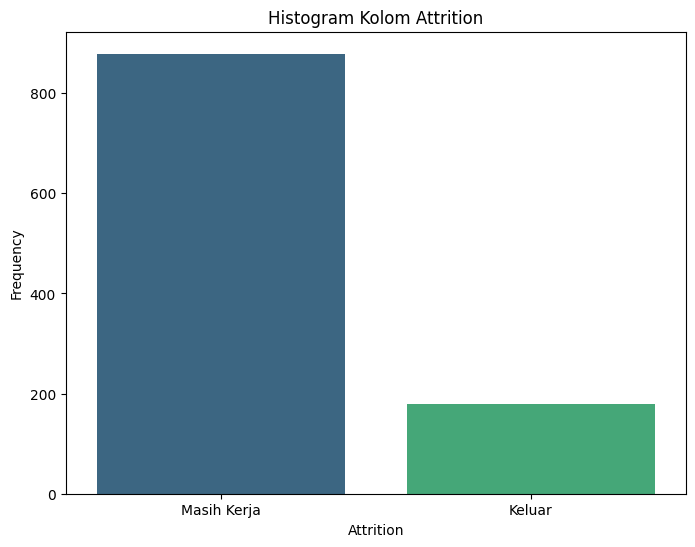

In [ ]:
# Histogram perbandingan antara pegawai yang masih bekerja dengan yang sudah keluar.

# Menghitung pegawai yang keluar (1) dan masih bekerja (0)
print(employee_df['Attrition'].value_counts())

plt.figure(figsize=(8, 6))
sns.countplot(data=employee_df, x='Attrition', hue='Attrition', palette='viridis', legend=False)
plt.title('Histogram Kolom Attrition')
plt.xlabel('Attrition')
plt.ylabel('Frequency')
plt.xticks(ticks=[0, 1], labels=['Masih Kerja', 'Keluar'])
plt.show()

Berdasarkan plot tersebut dapat dilihat bahwasanya karyawan yang masih bekerja(879) lebih banyak dibandingan yang keluar(179).

In [ ]:
# Menyimpan dataframe
employee_df.to_csv('employee.csv', index=False)

## Modeling

label target dalam dataset ini adalah kolom Attrition, dimana 0 untuk karyawan yang masih bekerja dan 1 untuk karyawan yang sudah keluar.

selanjutnya adalah menyeleksi fitur-fitur yang akan digunakan dalam membaut model ML-nya.

In [ ]:
employee_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1058 entries, 1 to 1469
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   EmployeeId                1058 non-null   int64 
 1   Age                       1058 non-null   int64 
 2   Attrition                 1058 non-null   int64 
 3   BusinessTravel            1058 non-null   object
 4   DailyRate                 1058 non-null   int64 
 5   Department                1058 non-null   object
 6   DistanceFromHome          1058 non-null   int64 
 7   Education                 1058 non-null   object
 8   EducationField            1058 non-null   object
 9   EnvironmentSatisfaction   1058 non-null   object
 10  Gender                    1058 non-null   object
 11  HourlyRate                1058 non-null   int64 
 12  JobInvolvement            1058 non-null   object
 13  JobLevel                  1058 non-null   int64 
 14  JobRole                   105

Fitur EmployeeId merupakan nomor id dari pegawai sehingga dapat dihapus, dikarenakan tidak mempengaruhi attrition pada pegawai.


In [ ]:
copy_employee_df = employee_df.copy()
copy_employee_df.drop(columns=['EmployeeId'], inplace=True)

In [ ]:
copy_employee_df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [ ]:
X = copy_employee_df.drop(columns=['Attrition'])
y = copy_employee_df['Attrition']

In [ ]:
X.columns

Index(['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

####Melakukan encoding untuk fitur kategorikal

In [ ]:
cat_cols = X.select_dtypes(include='object').columns.tolist()

In [ ]:
preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
], remainder='passthrough')

In [ ]:
pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('model', RandomForestClassifier(n_estimators=100, random_state=42))
])

#### Splitting dataset

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f'Jumlah data train: {len(X_train)}')
print(f'Jumlah data test: {len(X_test)}')

Jumlah data train: 846
Jumlah data test: 212


#### Training Model

In [ ]:
pipeline.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['BusinessTravel',
                                                   'Department', 'Education',
                                                   'EducationField',
                                                   'EnvironmentSatisfaction',
                                                   'Gender', 'JobInvolvement',
                                                   'JobRole', 'JobSatisfaction',
                                                   'MaritalStatus', 'OverTime',
                                                   'PerformanceRating',
                                                   'RelationshipSatisfaction',
                                                   'WorkLifeBalance'])])),
                ('model', RandomForestClassifier(random_state=42))])

#### Testing Model

In [ ]:
y_pred = pipeline.predict(X_test)
print('Accuracy Score: ', accuracy_score(y_test, y_pred))

Accuracy Score:  0.839622641509434


## Evaluation

In [ ]:
print('Classification Report: \n', classification_report(y_test, y_pred))
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))

Classification Report: 
               precision    recall  f1-score   support

           0       0.84      0.99      0.91       176
           1       0.75      0.08      0.15        36

    accuracy                           0.84       212
   macro avg       0.80      0.54      0.53       212
weighted avg       0.83      0.84      0.78       212

Confusion Matrix: 
 [[175   1]
 [ 33   3]]


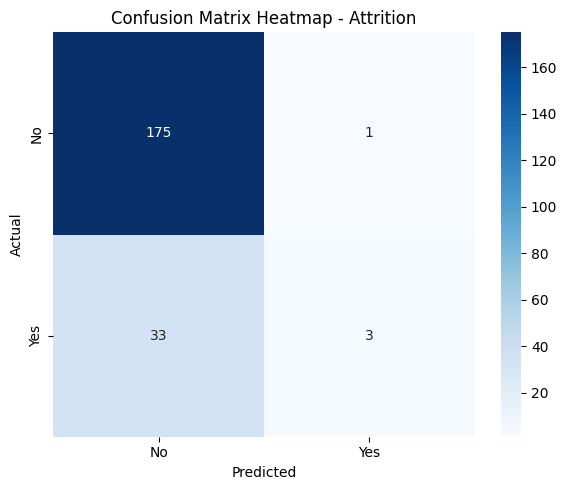

In [ ]:
cm = confusion_matrix(y_test, y_pred)
labels = ['No', 'Yes']
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap - Attrition')
plt.tight_layout()
plt.show()

In [ ]:
joblib.dump(pipeline, 'svm-model.pkl')
joblib.dump(X.columns.tolist(), 'features.pkl')

['features.pkl']